In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Get results from FPGA generated file
def readFPGAdata(ty, sizes, folder = "results/mvm/"):
    x = np.zeros(len(sizes))
    y_comm = np.zeros(len(sizes))
    y_comp = np.zeros(len(sizes))
    
     #get the mean for each file
    for i in range(len(sizes)):
        res = open(folder + "res_" + str(sizes[i]) + "_" + ty + ".txt", 'r')
        x[i] = 4096*pow(2, sizes[i])
        
        data = res.readlines()
        comm = np.zeros(len(data))
        comp = np.zeros(len(data))
        j = 0
        for line in data:
            clear = line.replace("\r", "").replace("\n", "").split(",")
            comm[j] = clear[0]
            comp[j] = clear[1]
            j = j+1

        y_comm[i] = np.mean(comm)
        y_comp[i] = np.mean(comp)
        res.close()
    return x, y_comm, y_comp

#Get results from thread tests
def getThreadBandwidthResults():
    result = open("res_thread.txt", 'r')
    data = result.readlines()
    x = np.zeros((len(data)-1));
    y = np.zeros(x.shape);
    i = 0
    for line in data[:-1]:
        clear = line.replace("\r", "").replace("\n", "").split(",")
        x[i] = clear[0]
        y[i] = clear[1]
        i= i + 1
    result.close()
    return x, y

def getOpenCLData(device, ty, folder="results/mvm/"):
    res = open(folder + "res_" + device + "_" + ty + ".txt", 'r')
    data = res.readlines()
    x = np.zeros(len(data))
    y = np.zeros(x.shape)
    i = 0
    for line in data:
        clear = line.replace("\r", "").replace("\n", "").split(",")
        x[i] = clear[0]
        y[i] = clear[1]
        i = i + 1
    res.close()
    return x,y

 #in B/sec with x = # of int32, y = time in ms
def getBandwidth(x, y):
    for i in range(len(x)):
        y[i] = (x[i]*4)/(y[i]/1000)
    return y

***

matrix vector mult mode pi

***

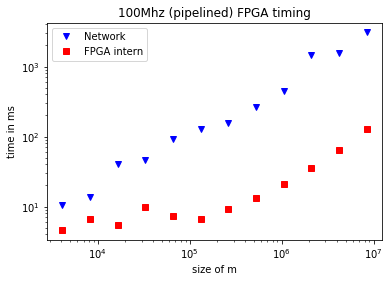

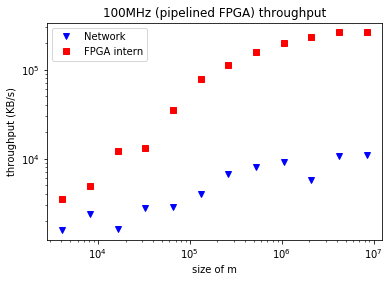

In [11]:
x1, y1, y2 = readFPGAdata("pi", range(12))
    
a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("time in ms")
plt.title("100Mhz (pipelined) FPGA timing")
plt.show()

#equivalent bandwidth
for i in range(len(x1)):
    y1[i] = (x1[i]*4/1000)/(y1[i]/1000)
    y2[i] = (x1[i]*4/1000)/(y2[i]/1000)

a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/s)")
plt.title("100MHz (pipelined FPGA) throughput")
plt.show()

x_pi, y_pi = x1, y2

***

matrix vector mult mode pi80

***

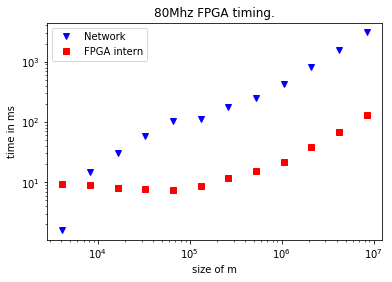

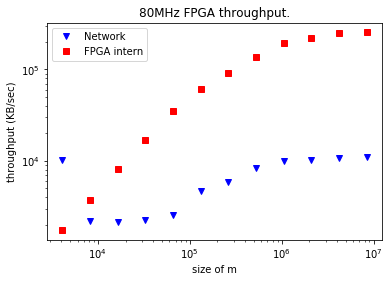

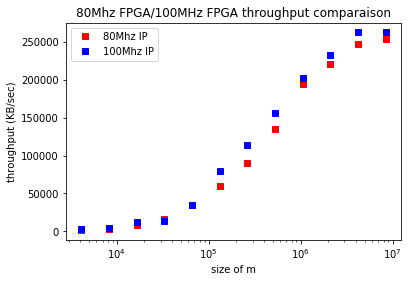

262144.0


In [4]:
x1, y1, y2 = readFPGAdata("pi80", range(12))
    
a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("time in ms")
plt.title("80Mhz FPGA timing.")
plt.show()

#equivalent bandwidth
for i in range(len(x1)):
    y1[i] = (x1[i]*4/1000)/(y1[i]/1000)
    y2[i] = (x1[i]*4/1000)/(y2[i]/1000)

a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/sec)")
plt.title("80MHz FPGA throughput.")
plt.show()

#compare with pi
a, = plt.plot(x1, y2, 'rs', label='80Mhz IP')
b, = plt.plot(x_pi, y_pi, 'bs', label='100Mhz IP')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/sec)")
plt.title("80Mhz FPGA/100MHz FPGA throughput comparaison")
plt.show()

print(y_pi[-1])

***

Test on pino

***

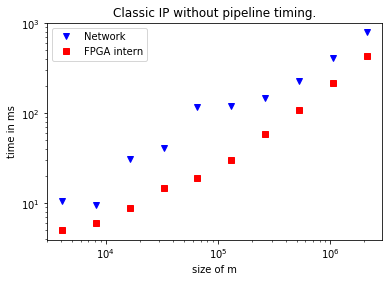

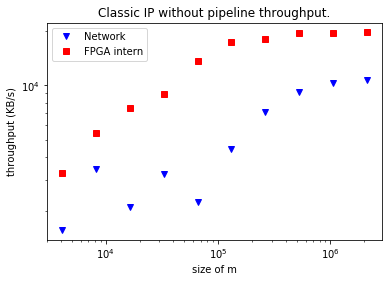

In [5]:
x1, y1, y2 = readFPGAdata("pino", range(10))
    
a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("time in ms")
plt.title("Classic IP without pipeline timing.")
plt.show()

#equivalent bandwidth
for i in range(len(x1)):
    y1[i] = (x1[i]*4/1000)/(y1[i]/1000)
    y2[i] = (x1[i]*4/1000)/(y2[i]/1000)

a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/s)")
plt.title("Classic IP without pipeline throughput.")
plt.show()


***

Test on split 100Mhz

***

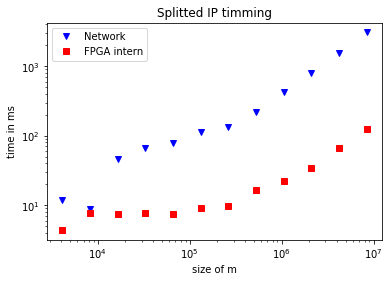

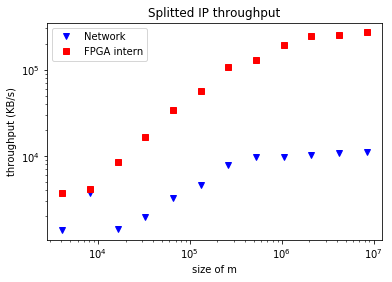

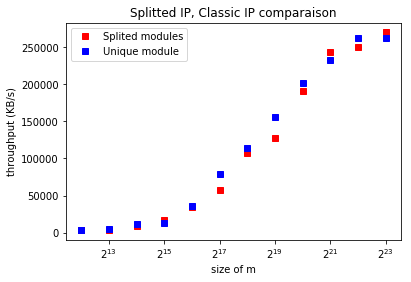

In [6]:
x1, y1, y2 = readFPGAdata("split", range(12))
    
a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("time in ms")
plt.title("Splitted IP timming")
plt.show()

#equivalent bandwidth
for i in range(len(x1)):
    y1[i] = (x1[i]*4/1000)/(y1[i]/1000)
    y2[i] = (x1[i]*4/1000)/(y2[i]/1000)

a, = plt.plot(x1, y1, 'bv', label = 'Network')
b, = plt.plot(x1, y2, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/s)")
plt.title("Splitted IP throughput")
plt.show()

#compare with pi
a, = plt.plot(x1, y2, 'rs', label='Splited modules')
b, = plt.plot(x_pi, y_pi, 'bs', label='Unique module')
plt.legend(handles=[a,b])

plt.xscale('log', basex=2)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/s)")
plt.title("Splitted IP, Classic IP comparaison")
plt.show()

***

Test on loop

***

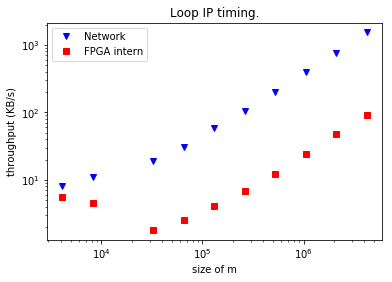

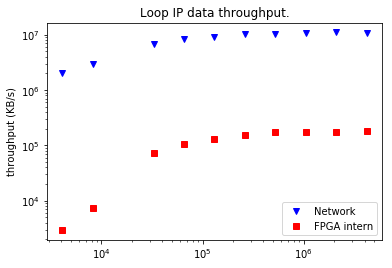

In [10]:
#compare with loop test.
x_l, y_ml, y_pl = readFPGAdata("loop", [0,1,3,4,5,6,7,8,9,10])

a, = plt.plot(x_l, y_ml, 'bv', label = 'Network')
b, = plt.plot(x_l, y_pl, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/s)")
plt.title("Loop IP timing.")
plt.show()

y_ll = getBandwidth(x_l, y_ml)/1000
y_pl = getBandwidth(x_l, y_pl)/1000
    
a, = plt.plot(x_l, y_ml, 'bv', label = 'Network')
b, = plt.plot(x_l, y_pl, 'rs', label = 'FPGA intern')
plt.legend(handles=[a,b])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.ylabel("time in ms")
plt.ylabel("throughput (KB/s)")
plt.title("Loop IP data throughput.")
plt.show()

#check data

***

GPU/CPU results

***

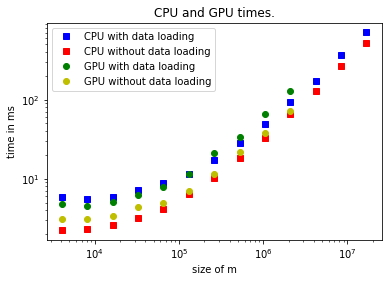

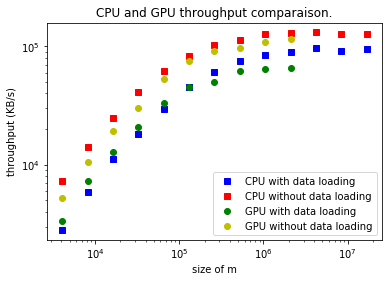

In [8]:
x_cpul, y_cpul = getOpenCLData("cpu", "l") # blue   (square)
x_cpus, y_cpus = getOpenCLData("cpu", "s") # red    (square)
x_gpul, y_gpul = getOpenCLData("gpu", "l") # green  (circle)
x_gpus, y_gpus = getOpenCLData("gpu", "s") # purple (circle)

a, = plt.plot(x_cpul, y_cpul, 'bs', label = 'CPU with data loading')
b, = plt.plot(x_cpus, y_cpus, 'rs', label = 'CPU without data loading')
c, = plt.plot(x_gpul, y_gpul, "go", label = 'GPU with data loading')
d, = plt.plot(x_gpus, y_gpus, "yo", label = 'GPU without data loading')
plt.legend(handles=[a,b,c,d])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("time in ms")
plt.title("CPU and GPU times.")
plt.show()


y_cpul = getBandwidth(x_cpul, y_cpul)/1000
y_cpus = getBandwidth(x_cpus, y_cpus)/1000
y_gpul = getBandwidth(x_gpul, y_gpul)/1000
y_gpus = getBandwidth(x_gpus, y_gpus)/1000

a, = plt.plot(x_cpul, y_cpul, 'bs', label = 'CPU with data loading')
b, = plt.plot(x_cpus, y_cpus, 'rs', label = 'CPU without data loading')
c, = plt.plot(x_gpul, y_gpul, "go", label = 'GPU with data loading')
d, = plt.plot(x_gpus, y_gpus, "yo", label = 'GPU without data loading')
plt.legend(handles=[a,b,c,d])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/s)")
plt.title("CPU and GPU throughput comparaison.")
plt.show()

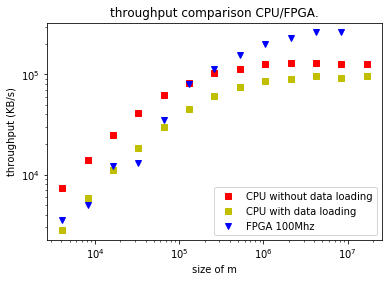

In [12]:
#compare CPU (without kernel compilation) with FPGA (pi)

a, = plt.plot(x_cpus, y_cpus, 'rs', label = 'CPU without data loading')
b, = plt.plot(x_cpul, y_cpul, 'ys', label = 'CPU with data loading')
c, = plt.plot(x_pi, y_pi, 'bv', label = 'FPGA 100Mhz')
plt.legend(handles=[a,b,c])

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)
plt.xlabel("size of m")
plt.ylabel("throughput (KB/s)")
plt.title("throughput comparison CPU/FPGA.")
plt.show()